In [1]:
using TSSM
using PyPlot
include("time_stepper.jl");

INFO: Recompiling stale cache file /home/hofi/.julia/lib/v0.4/TSSM.ji for module TSSM.


including tssm_fourier.jl for type Float64
    Fourier1D
    Fourier2D
    Fourier3D
    FourierReal1D
    FourierReal2D
    FourierReal3D
including tssm_fourier_bessel.jl for type Float64
    FourierBessel2D
    FourierBesselReal2D
    BesselRotSym1D
    BesselRotSymReal1D
including tssm_schroedinger.jl for type Float64
    Schroedinger1D
    Schroedinger2D
    Schroedinger3D
    SchroedingerReal1D
    SchroedingerReal2D
    SchroedingerReal3D
including tssm_schroedinger_hermite.jl for type Float64
    SchroedingerHermite1D
    SchroedingerHermite2D
    SchroedingerHermite3D
    SchroedingerHermiteReal1D
    SchroedingerHermiteReal2D
    SchroedingerHermiteReal3D
including tssm_common.jl for type Float64
    Fourier1D
    Fourier2D
    Fourier3D
    FourierReal1D
    FourierReal2D
    FourierReal3D
    FourierBessel2D
    FourierBesselReal2D
    BesselRotSym1D
    BesselRotSymReal1D
    Schroedinger1D
    Schroedinger2D
    Schroedinger3D
    SchroedingerReal1D
    SchroedingerReal2D


/home/hofi/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


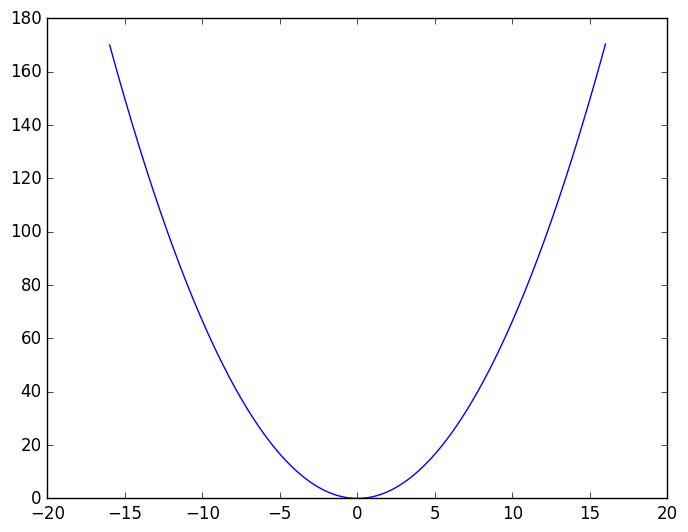

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f2594784b90>

In [154]:
const omega_x = 1.1
const hbar = 1.1
const mass = 1.1
const x0 = sqrt(hbar/mass/omega_x)
const alpha = 1.1

function harmonic(x)
    0.5*mass*omega_x^2*x.^2
end

nx = 2048
xmin = -16
xmax = +16

method = Schroedinger1D(nx, xmin, xmax, hbar=hbar, mass=mass, potential=harmonic)

plot(get_nodes(method), get_potential(method))

In [155]:
function coherent_state(x, t)
    xi = x/x0
    alpha_t=alpha*exp(-omega_x*t*1im)
    return ( 1.0./sqrt(x0*sqrt(pi))*exp(-0.5im*omega_x*t)
           *exp(sqrt(2.0)*alpha_t*xi - 0.5*xi.^2 - real(alpha_t)*alpha_t) )
end


coherent_state (generic function with 1 method)

In [156]:
t0 = 0
tend = 1
psi = wave_function(method)
psi_ref = wave_function(method)
set!(psi, coherent_state, t0)        # initial data at t=t0
set!(psi_ref, coherent_state, tend)  # reference solution at t=tend

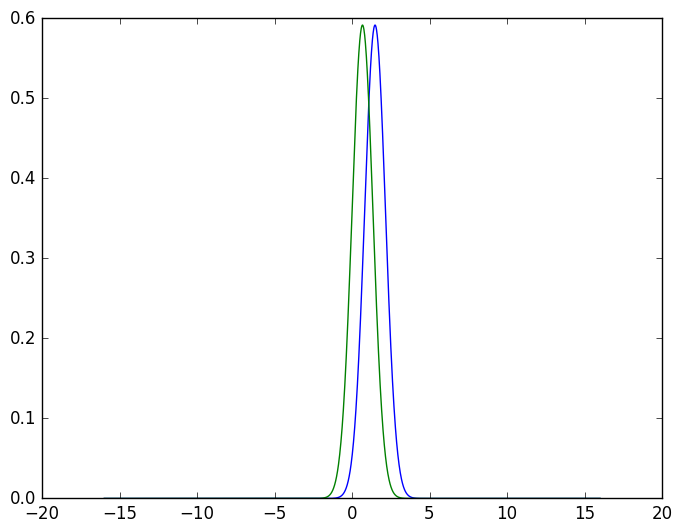

In [157]:
plot(get_nodes(method), abs(get_data(psi)).^2)
hold(true)
plot(get_nodes(method), abs(get_data(psi_ref)).^2)
hold(false)

In [158]:
global_orders(psi, psi_ref, t0, tend, tend-t0, scheme=Strang, rows=12) 
; 

             dt         err      p
-----------------------------------
  1   1.000e+00   3.260e-01
  2   5.000e-01   7.018e-02   2.22
  3   2.500e-01   1.691e-02   2.05
  4   1.250e-01   4.191e-03   2.01
  5   6.250e-02   1.045e-03   2.00
  6   3.125e-02   2.612e-04   2.00
  7   1.563e-02   6.528e-05   2.00
  8   7.813e-03   1.632e-05   2.00
  9   3.906e-03   4.080e-06   2.00
 10   1.953e-03   1.020e-06   2.00
 11   9.766e-04   2.550e-07   2.00
 12

In [159]:
include("time_stepper.jl");

   4.883e-04   6.375e-08   2.00


In [162]:
local_orders(psi, coherent_state, t0, tend-t0, DefectBasedScheme(Strang, 2), operator_sequence="AB", rows=10)
;

             dt         err      p         err      p
------------------------------------------------------
  1   1.000e+00   3.260e-01          1.012e-01
  2   5.000e-01   4.803e-02   2.76   3.798e-03   4.74
  3   2.500e-01   6.205e-03   2.95   2.847e-04   3.74
  4   1.250e-01   7.818e-04   2.99   1.903e-05   3.90
  5   6.250e-02   9.792e-05   3.00   1.210e-06   3.97
  6   3.125e-02   1.225e-05   3.00   7.597e-08   3.99
  7   1.563e-02   1.531e-06   3.00   4.753e-09   4.00
  8   7.813e-03   1.914e-07   3.00   2.972e-10   4.00
  9   3.906e-03   2.392e-08   3.00   1.857e-11   4.00
 10   1.953e-03   2.990e-09   3.00   1.161e-12   4.00


In [163]:
scheme_5 = ( 0.201651044312324230,   0.578800656272664932, 
             0.562615975356569200,   0.273128836056524479, 
             0.253874038247554845,  -0.102733803148432142, 
            -0.835351693190370636,   0.068014946093165092, 
             0.068014946093165092,  -0.835351693190370636,
            -0.102733803148432142,   0.253874038247554845, 
             0.273128836056524479,   0.562615975356569200, 
             0.578800656272664932,   0.201651044312324230 )          
global_orders(psi, psi_ref, t0, tend, tend-t0, scheme=scheme_5, rows=7) 
;

             dt         err      p
-----------------------------------
  1   1.000e+00   5.280e-04
  2   5.000e-01   1.032e-05   5.68
  3   2.500e-01   4.391e-07   4.55
  4   1.250e-01   1.607e-08   4.77
  5   6.250e-02   5.405e-10   4.89
  6   3.125e-02   1.750e-11   4.95
  7   1.563e-02   5.568e-13   4.97


In [164]:
local_orders(psi, coherent_state, t0, tend-t0, DefectBasedScheme(scheme_5, 5), operator_sequence="AB", rows=6)
;

             dt         err      p         err      p
------------------------------------------------------
  1   1.000e+00   5.280e-04          2.275e-04
  2   5.000e-01   7.664e-06   6.11   8.091e-07   8.14
  3   2.500e-01   1.354e-07   5.82   4.341e-09   7.54
  4   1.250e-01   2.185e-09   5.95   3.040e-11   7.16
  5   6.250e-02   3.441e-11   5.99   2.358e-13   7.01
  6   3.125e-02   5.388e-13   6.00   2.403e-14   3.29


In [165]:
local_orders(psi, coherent_state, t0, tend-t0, PalindromicScheme(scheme_5, 5), operator_sequence="AB", rows=6)
;

             dt         err      p         err      p
------------------------------------------------------
  1   1.000e+00   5.280e-04          8.989e-04
  2   5.000e-01   7.664e-06   6.11   6.347e-06   7.15
  3   2.500e-01   1.354e-07   5.82   4.825e-08   7.04
  4   1.250e-01   2.185e-09   5.95   3.743e-10   7.01
  5   6.250e-02   3.441e-11   5.99   2.919e-12   7.00
  6   3.125e-02   5.388e-13   6.00   2.276e-14   7.00


In [166]:
nx = 2048
method = SchroedingerHermite1D(nx, omega_x, hbar=hbar, mass=mass, potential=harmonic)

TSSM.SchroedingerHermite1D{Float64}(Ptr{Void} @0x00000000070d83e0)

In [167]:
t0 = 0
tend = 1
psi = wave_function(method)
psi_ref = wave_function(method)
set!(psi, coherent_state, t0)        # initial data at t=t0
set!(psi_ref, coherent_state, tend)  # reference solution at t=tend

propagate_A!(psi, tend-t0)
distance(psi, psi_ref)

6.445106651960332e-16